In [1]:
# Baseline: the man of all traces (delta signal) is calculated and subtracted from each trace.

In [1]:
import glob
from headtail.modules import bqht
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
# Create a new instance ands set the system to SPS
ht = bqht.BQHT(system='SPS')
# Select a file to use
dataDir = './h5_files/28May2018/'
files = sorted(glob.glob(dataDir+'/*.h5'))

In [3]:
files

['./h5_files/28May2018/SPS.BQHT_LHC2_20180523_170239.h5']

In [4]:
def prep_file(name):
    htf = ht.open_file(f'{name}')
    htf.locate_bunches()
    htf.optimise_overlap()
    htf.remove_baseline = False # Don't remove baseline
    htf.align = True            # Get aligned to the same X points
    return htf

In [5]:
# Create a new instance ands set the system to SPS
ht = bqht.BQHT(system='SPS')
# Select a file to use
dataDir = './h5_files/28May2018/'
files = sorted(glob.glob(dataDir+'/*.h5'))
name = files[0]

In [6]:
htf_0 = prep_file(files[0])  # stracture: htf_0.data.horizontal.delta[turns, bunches]['time', 'value']

In [ ]:
htf_0

In [18]:
def string2unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S.%f").timetuple())

def unix2string(f):
    return datetime.datetime.fromtimestamp(int(f)).strftime('%Y-%m-%d %H:%M:%S.%f')


def prep_file(name):
    htf = ht.open_file(f'{name}')
    htf.locate_bunches()
    htf.optimise_overlap()
    for p, s in htf.planes_signals:
        htf[p][s].remove_baseline = False # Don't remove baseline
        htf[p][s].align = True            # Get aligned to the same X points
    return htf


def calc_means(htf, N):
    pts = int(htf.horizontal.sigma.samples_per_bunch)
    M = int(htf.horizontal.sigma.number_of_turns/N)
    means_delta = []
    means_sigma = []
    for i in range(N):
        mean_delta = np.zeros(pts)
        mean_sigma = np.zeros(pts)
        for j in range(M):
            x, y = htf.vertical.sigma[i*M+j,0]
            mean_sigma += y
            x, y = htf.vertical.delta[i*M+j,0]
            mean_delta += y
        mean_delta /= M
        mean_sigma /= M
        means_delta.append(mean_delta)
        means_sigma.append(mean_sigma)
    return (np.array(means_sigma), np.array(means_delta))


def getOrbitResponse():
    # Bring in relevant optics parameters to calculate orbit response
    # at location of HT monitor from CC kick

    PAY = 8.230968*(2*np.pi) #Slide 16 of Hannes' JUAS
    beta_cc = 64.776662
    beta_ht = 49.434524
    total_Q = 26.18

    orbitResponse1 = np.sqrt(beta_ht)/(2*np.sin(np.pi*total_Q)) #slide 42 of Hannes' JUAS
    orbitResponse2 = np.sqrt(beta_cc)*np.cos(np.pi*total_Q - PAY)
    orbitResponse = orbitResponse1*orbitResponse2
    return orbitResponse



def getHTtraces(sigma, delta):
    
    mid = np.argmax(sigma[-1])
    a = mid - 12
    b = mid + 13

    #plot(x, sigma[-1][a:b] * 8 - 0.4, c=color, ls=linestyle)
    #calculate amplitude scaling factor to ensure result is in MV (from mm)

    normPositionFactor = 0.1052 #This factor comes from T. Levens and was measured in 2017
    amp_factor = 1/(normPositionFactor)      #1e-6 is for V to MV
    
    signal = (delta[-1] - delta[0])[a:b] / sigma[-1][a:b]
    return signal*amp_factor, sigma[-1][a:b]

def yGauss(x):
    sig = 2.22 #mm
    intensity = 1
    return intensity/(sig*np.sqrt(2*np.pi))*np.exp(-x*x/(2*sig*sig))

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))



In [88]:
htf_0 = prep_file(files[0])  

In [89]:
# htf_0.horizontal.delta [turns][bunhches]

<BQHTDataset: horizontal.delta>

In [39]:
N=1

sigma_0, delta_0 = calc_means(htf_0, N)

In [ ]:
htf['']

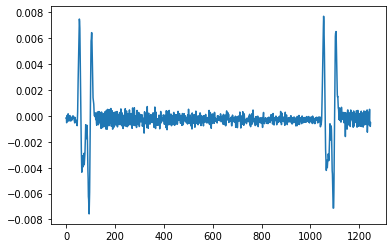

In [78]:
plt.plot(htf_0.vertical.delta[1][1])

In [76]:
htf_0.vertical.delta.samples_per_bunch

249.5887445887446

NameError: name 'htf' is not defined

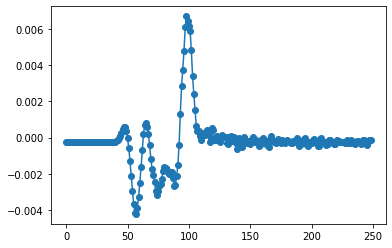

In [52]:
plt.plot(list(delta_0[0]), 'o-')

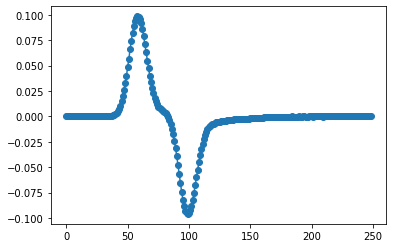

In [53]:
plt.plot(list(sigma_0[0]), 'o-')

In [21]:
htf_0.horizontal.sigma.samples_per_bunch

249.5887445887446

In [22]:
htf_0.bunches

[0]

In [23]:
htf_0.horizontal.sigma.number_of_bunches

4

In [24]:
htf_0.horizontal.sigma.number_of_turns

40000

In [25]:
htf_0.horizontal.sigma.period

1e-10

In [83]:
htf1 = ht.open_file(f'{files[0]}')
for p, s in htf1.planes_signals:
    print(p,s)
    print(type(p))

horizontal delta
<class 'str'>
horizontal sigma
<class 'str'>
vertical delta
<class 'str'>
vertical sigma
<class 'str'>


In [31]:
htf1.planes_signals

[('horizontal', 'delta'),
 ('horizontal', 'sigma'),
 ('vertical', 'delta'),
 ('vertical', 'sigma')]

In [37]:
htf1.horizontal.delta.number_of_bunches

4